In [0]:
#import my data from mydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'18tRc2ZOOe2nx9-h2TNn09G8ie4JMrdw9'}) 
downloaded.GetContentFile('train-v2.0.json')
filename = 'train-v2.0.json'

In [0]:
import pandas as pd
import numpy as np

In [3]:
# Read file
data = pd.read_csv(filename)

# eliminate some columns
del data['<PER>']
del data['<TICKER>']
del data['<DTYYYYMMDD>']

#reverse the data
data = data[::-1]

data

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
2821,4105.0,4350.0,4062.0,4300.0,8291495000,1980000,780,4105.0,4300.0
2820,4407.0,4407.0,4407.0,4407.0,1101750000,250000,209,4300.0,4407.0
2819,4517.0,4517.0,4517.0,4517.0,1129250000,250000,165,4407.0,4517.0
2818,4629.0,4629.0,4629.0,4629.0,41661000,9000,8,4517.0,4629.0
2817,4744.0,4744.0,4744.0,4744.0,105316800,22200,19,4629.0,4744.0
...,...,...,...,...,...,...,...,...,...
4,26800.0,26911.0,26000.0,26799.0,34467691628,1286171,990,25630.0,26911.0
3,28138.0,29272.0,28138.0,28418.0,43502447530,1530826,1767,26799.0,28469.0
2,28200.0,28800.0,26998.0,27380.0,94058158593,3435346,2750,28418.0,26998.0
1,26200.0,27680.0,26011.0,26384.0,43037123816,1631210,1656,27380.0,26200.0


In [75]:
from sklearn import preprocessing

data2 = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data2)
data2 = pd.DataFrame(x_scaled)
data2

,0,1,2,3,4,5,6,7,8
0,0.010195,0.012963,0.008668,0.010996,0.035490,0.236272,0.207236,0.005988,0.013424
1,0.021309,0.015074,0.021448,0.014985,0.004716,0.029832,0.055334,0.013240,0.017402
2,0.025358,0.019148,0.025523,0.019085,0.004833,0.029832,0.043629,0.017220,0.021493
3,0.029480,0.023296,0.029672,0.023260,0.000178,0.001074,0.001862,0.021311,0.025657
4,0.033712,0.027556,0.033932,0.027547,0.000451,0.002649,0.004789,0.025476,0.029933
...,...,...,...,...,...,...,...,...,...
2817,0.845460,0.848556,0.821337,0.849666,0.147531,0.153478,0.263102,0.806531,0.854200
2818,0.894704,0.936000,0.900537,0.910016,0.186202,0.182672,0.469806,0.850007,0.912133
2819,0.896986,0.918519,0.858307,0.871324,0.402594,0.409937,0.731312,0.910220,0.857435
2820,0.823378,0.877037,0.821745,0.834197,0.184210,0.194651,0.440277,0.871616,0.827762


In [78]:
new_data = []
columns = 0

for i in range(0,len(data2)-60):
    temp = []
    for j in range(0, 60):
        columns_values = []
        
        #if (i+j) < len(data)-1:
        #print( " i is : ", i , " and j is : ", j, " and i+j is : ", i+j)
        #print("\n")
        
        # have a row of values (row = i+j)
        columns_values.append(data2.iloc[i+j][0])
        columns_values.append(data2.iloc[i+j][1])
        columns_values.append(data2.iloc[i+j][2])
        columns_values.append(data2.iloc[i+j][3])
        columns_values.append(data2.iloc[i+j][4])
        columns_values.append(data2.iloc[i+j][5])
        columns_values.append(data2.iloc[i+j][6])
        columns_values.append(data2.iloc[i+j][7])
        columns_values.append(data2.iloc[i+j][8])

        temp.append(columns_values)
            
    temp = np.array(temp)
    #print(temp.shape)
   

    new_data.append(temp)
    

new_data = np.array(new_data)

print(new_data.shape)
print("\n")

#print(new_data[0])

(2762, 60, 9)




In [79]:
#First
data.iloc[1+2][0]

4629.0

In [6]:
columns_values

[26200.0,
 27680.0,
 26011.0,
 26384.0,
 43037123816.0,
 1631210.0,
 1656.0,
 27380.0,
 26200.0]

In [80]:
new_data[0]

array([[1.01946929e-02, 1.29629630e-02, 8.66827190e-03, 1.09963842e-02,
        3.54897987e-02, 2.36271514e-01, 2.07235967e-01, 5.98780125e-03,
        1.34235675e-02],
       [2.13094844e-02, 1.50740741e-02, 2.14484164e-02, 1.49849033e-02,
        4.71576568e-03, 2.98321576e-02, 5.53338654e-02, 1.32401071e-02,
        1.74022980e-02],
       [2.53579184e-02, 1.91481481e-02, 2.55232450e-02, 1.90852499e-02,
        4.83347304e-03, 2.98321576e-02, 4.36286246e-02, 1.72195775e-02,
        2.14925817e-02],
       [2.94799603e-02, 2.32962963e-02, 2.96721615e-02, 2.32601484e-02,
        1.78301013e-04, 1.07384264e-03, 1.86219739e-03, 2.13106218e-02,
        2.56572342e-02],
       [3.37124140e-02, 2.75555556e-02, 3.39322097e-02, 2.75468744e-02,
        4.50764875e-04, 2.64898687e-03, 4.78850758e-03, 2.54760488e-02,
        2.99334399e-02],
       [3.80552795e-02, 3.19259259e-02, 3.83033895e-02, 3.19454281e-02,
        3.12140702e-04, 1.78981729e-03, 2.66028199e-03, 2.97530497e-02,
        3.4

In [81]:
labels = []

for i in range(60, len(data)):
    labels.append(data.iloc[i][3])
labels

[7355.0,
 7428.0,
 7428.0,
 7354.0,
 7281.0,
 7281.0,
 7353.0,
 7360.0,
 7359.0,
 7432.0,
 7435.0,
 7400.0,
 7326.0,
 7260.0,
 7188.0,
 7117.0,
 7188.0,
 7259.0,
 7331.0,
 7258.0,
 7319.0,
 7392.0,
 7465.0,
 7466.0,
 7540.0,
 7615.0,
 7691.0,
 7767.0,
 7844.0,
 7766.0,
 7697.0,
 7765.0,
 7737.0,
 7814.0,
 7800.0,
 7722.0,
 7645.0,
 7569.0,
 7494.0,
 7568.0,
 7643.0,
 7652.0,
 7647.0,
 7620.0,
 7544.0,
 7600.0,
 7550.0,
 7546.0,
 7471.0,
 7471.0,
 7449.0,
 7375.0,
 7302.0,
 7229.0,
 7157.0,
 7157.0,
 7152.0,
 7158.0,
 7167.0,
 7166.0,
 7169.0,
 7169.0,
 7187.0,
 7187.0,
 6828.0,
 6487.0,
 6163.0,
 5855.0,
 5563.0,
 5481.0,
 5478.0,
 5350.0,
 5195.0,
 5100.0,
 5029.0,
 4900.0,
 4655.0,
 4460.0,
 4460.0,
 4464.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4478.0,
 4493.0,
 4566.0,
 4570.0,
 4594.0,
 4596.0,
 4607.0,
 4629.0,
 4711.0,
 4735.0,
 4745.0,
 4745.0,
 4749.0,
 4751.0,
 4751.0,
 4760.0,
 

In [84]:
labels= np.array(labels)
labels

array([ 7355.,  7428.,  7428., ..., 27380., 26384., 26301.])

In [86]:
labels = min_max_scaler.fit_transform(labels.reshape(-1, 1))
labels

array([[0.12487419],
       [0.12759533],
       [0.12759533],
       ...,
       [0.87132367],
       [0.83419689],
       [0.83110299]])

In [0]:
labels = labels.reshape(-1)

In [88]:
len(labels)

2762

In [89]:
len(new_data)

2762

In [11]:
type(np.array(labels))

numpy.ndarray

In [12]:
type(new_data[0])

numpy.ndarray

In [13]:
type(new_data[0][0])

numpy.ndarray

In [108]:
test_len = 256

index_1 = int(len(new_data) * 0.80)
index_2 = int(len(new_data)- test_len)

train_x = new_data[0: index_1]
valid_x = new_data[index_1 : index_2]
test_x = new_data[index_2:]



train_y = labels[0: index_1]
valid_y = labels[index_1: index_2]
test_y = labels[index_2:]


print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape ,test_x.shape, test_y.shape)

(2209, 60, 9) (2209,) (297, 60, 9) (297,) (256, 60, 9) (256,)


In [0]:
BATCH_SIZE = 128
TIME_STEPS = 60

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, LSTM, Dropout
from keras import optimizers

lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, train_x.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='linear'))
optimizer = optimizers.RMSprop(lr=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)



In [111]:
from keras.callbacks import CSVLogger
import os

history = lstm_model.fit(train_x[:int(len(train_x) / 128) * 128], train_y[:int(len(train_x) / 128) * 128], epochs=100, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=( valid_x[:int(len(valid_x) / 128) * 128] , valid_y[:int(len(valid_y) / 128) * 128]))

Train on 2176 samples, validate on 256 samples
Epoch 1/100
 - 3s - loss: 0.0058 - val_loss: 0.0013
Epoch 2/100
 - 2s - loss: 0.0020 - val_loss: 2.6800e-04
Epoch 3/100
 - 2s - loss: 0.0017 - val_loss: 1.4011e-04
Epoch 4/100
 - 2s - loss: 0.0015 - val_loss: 2.2325e-04
Epoch 5/100
 - 2s - loss: 0.0012 - val_loss: 9.2434e-05
Epoch 6/100
 - 2s - loss: 0.0012 - val_loss: 5.2301e-05
Epoch 7/100
 - 2s - loss: 0.0012 - val_loss: 9.3472e-05
Epoch 8/100
 - 2s - loss: 0.0010 - val_loss: 4.7279e-05
Epoch 9/100
 - 2s - loss: 9.8571e-04 - val_loss: 3.6926e-05
Epoch 10/100
 - 2s - loss: 9.7981e-04 - val_loss: 3.6005e-05
Epoch 11/100
 - 2s - loss: 8.6013e-04 - val_loss: 3.6231e-05
Epoch 12/100
 - 2s - loss: 7.0582e-04 - val_loss: 3.8351e-05
Epoch 13/100
 - 2s - loss: 9.2201e-04 - val_loss: 4.1575e-05
Epoch 14/100
 - 2s - loss: 7.0099e-04 - val_loss: 3.6220e-05
Epoch 15/100
 - 2s - loss: 7.2524e-04 - val_loss: 3.2274e-05
Epoch 16/100
 - 2s - loss: 6.9981e-04 - val_loss: 3.0643e-05
Epoch 17/100
 - 2s - l

256
256


<function matplotlib.pyplot.show>

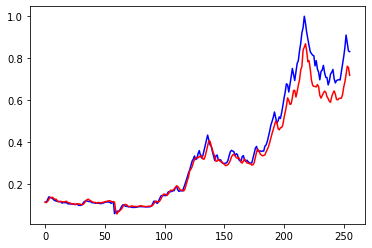

In [112]:
import matplotlib.pyplot as plt
# from keras.models import load_model
#lstm_model = load_model('my_model.h5')

print(len(test_x))
predicted_stateful = lstm_model.predict(test_x[:int(len(test_x) / 128) * 128], 128)

print(len(predicted_stateful))

plt.plot(test_y[:int(len(test_x) / 128) * 128], 'b',predicted_stateful, 'r' )

plt.show